<a href="https://colab.research.google.com/github/fmuranda/Climate_Science./blob/main/tutorials/W1D5_IntroductiontoClimateModeling/W1D5_Tutorial3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/neuromatch/climate-course-content/blob/main/tutorials/W1D5_IntroductiontoClimateModeling/W1D5_Tutorial3.ipynb) &nbsp; <a href="https://kaggle.com/kernels/welcome?src=https://raw.githubusercontent.com/neuromatch/climate-course-content/main/tutorials/W1D5_IntroductiontoClimateModeling/W1D5_Tutorial3.ipynb" target="_parent"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Open in Kaggle"/></a>


# Tutorial 3: A Zero-Dimensional Energy Balance Model

**Week 1, Day 5, Introduction to Climate Modeling**

**Content creators:** Jenna Pearson, Brian E. J. Rose

**Content reviewers:** Mujeeb Abdulfatai, Nkongho Ayuketang Arreyndip, Jeffrey N. A. Aryee, Younkap Nina Duplex, Zahra Khodakaramimaghsoud, Will Gregory, Paul Heubel, Zahra Khodakaramimaghsoud, Peter Ohue, Agustina Pesce, Abel Shibu, Derick Temfack, Yunlong Xu, Peizhen Yang, Chi Zhang, Ohad Zivan

**Content editors:** Paul Heubel, Brodie Pearson, Abigail Bodner, Ohad Zivan, Chi Zhang

**Production editors:** Wesley Banfield, Paul Heubel, Jenna Pearson, Konstantine Tsafatinos, Chi Zhang, Ohad Zivan

**Our 2024 Sponsors:** CMIP, NFDI4Earth


# Tutorial Objectives

*Estimated timing of tutorial:* 30 minutes

In this tutorial students will learn about the heat capacity of the atmosphere and oceans, how this related to temperature changes over time, and set up their first climate model.

By the end of this tutorial students will be able to:

- Calculate the heat capacity of the ocean and atmosphere.
- Create and run a time-dependent model of the change in global mean surface temperature in response to energy imbalances.
- Describe the influence of transmissivity and albedo on the equilibrium temperature from this model.
- Bonus: Understand what equilibrium climate sensitivity is and how to find it using the model.

*This tutorial is based on content from [The Climate Laboratory](https://brian-rose.github.io/ClimateLaboratoryBook/) by Brian E. J. Rose.*

# Setup


In [43]:
# imports
import numpy as np  # used for algebra and array operations
import matplotlib.pyplot as plt  # used for plotting

In [44]:
# @title Install and import feedback gadget

!pip3 install vibecheck datatops --quiet

from vibecheck import DatatopsContentReviewContainer
def content_review(notebook_section: str):
    return DatatopsContentReviewContainer(
        "",  # No text prompt
        notebook_section,
        {
            "url": "https://pmyvdlilci.execute-api.us-east-1.amazonaws.com/klab",
            "name": "comptools_4clim",
            "user_key": "l5jpxuee",
        },
    ).render()


feedback_prefix = "W1D5_T3"

In [45]:
# @title Figure settings
import ipywidgets as widgets  # interactive display

%config InlineBackend.figure_format = 'retina'
plt.style.use(
    "https://raw.githubusercontent.com/neuromatch/climate-course-content/main/cma.mplstyle"
)

In [46]:
# @title Video 1: A Zero-Dimensional Energy Balance Model

from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display


class PlayVideo(IFrame):
    def __init__(self, id, source, page=1, width=400, height=300, **kwargs):
        self.id = id
        if source == "Bilibili":
            src = f"https://player.bilibili.com/player.html?bvid={id}&page={page}"
        elif source == "Osf":
            src = f"https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{id}/?direct%26mode=render"
        super(PlayVideo, self).__init__(src, width, height, **kwargs)


def display_videos(video_ids, W=400, H=300, fs=1):
    tab_contents = []
    for i, video_id in enumerate(video_ids):
        out = widgets.Output()
        with out:
            if video_ids[i][0] == "Youtube":
                video = YouTubeVideo(
                    id=video_ids[i][1], width=W, height=H, fs=fs, rel=0
                )
                print(f"Video available at https://youtube.com/watch?v={video.id}")
            else:
                video = PlayVideo(
                    id=video_ids[i][1],
                    source=video_ids[i][0],
                    width=W,
                    height=H,
                    fs=fs,
                    autoplay=False,
                )
                if video_ids[i][0] == "Bilibili":
                    print(
                        f"Video available at https://www.bilibili.com/video/{video.id}"
                    )
                elif video_ids[i][0] == "Osf":
                    print(f"Video available at https://osf.io/{video.id}")
            display(video)
        tab_contents.append(out)
    return tab_contents


video_ids = [("Youtube", "aX34LHt0DTg"), ("Bilibili", "BV1514y1R7Dt")]
tab_contents = display_videos(video_ids, W=730, H=410)
tabs = widgets.Tab()
tabs.children = tab_contents
for i in range(len(tab_contents)):
    tabs.set_title(i, video_ids[i][0])
display(tabs)

In [47]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_A_Zero_Dimensional_Energy_Balance_Model_Video")

In [48]:
# @markdown
from ipywidgets import widgets
from IPython.display import IFrame

link_id = "5mgns"

print(f"If you want to download the slides: https://osf.io/download/{link_id}/")
IFrame(src=f"https://mfr.ca-1.osf.io/render?url=https://osf.io/{link_id}/?direct%26mode=render%26action=download%26mode=render", width=854, height=480)

If you want to download the slides: https://osf.io/download/5mgns/


In [49]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_A_Zero_Dimensional_Energy_Balance_Model_Slides")

# Section 1: Building the Model


## Section 1.1: Moving Forward in Time


One of the crucial things missing from the simple model we have looked at so far is its ability to _change with time_.

As the composition of the atmosphere (among other things) changes, in response, so does the energy balance and global mean surface temperature. This is shown by the thick black lines in the figure below, where the time series of observed global mean surface air temperature change from the 1850-1900 reference period is plotted. Figures like this are called 'hockey stick' figures due to their shape: a relatively stable period followed by a steep increase.

![Observerd and simulated change in temperature](https://www.ipcc.ch/report/ar6/wg1/downloads/figures/IPCC_AR6_WGI_Figure_3_4.png)
Figure 3.4 | Observed and simulated time series of the anomalies in annual and global mean surface air temperature (GSAT). All anomalies are differences from the 1850–1900 time mean of each individual time series. The reference period 1850–1900 is indicated by grey shading. (a) Single simulations from CMIP6 models (thin lines) and the multi-model mean (thick red line). Observational data (thick black lines) are from the Met Office Hadley Centre/Climatic Research Unit dataset (HadCRUT5), and are blended surface temperature (2 m air temperature over land and sea surface temperature over the ocean). All models have been subsampled using the HadCRUT5 observational data mask. Vertical lines indicate large historical volcanic eruptions. CMIP6 models which are marked with an asterisk are either tuned to reproduce observed warming directly, or indirectly by tuning equilibrium climate sensitivity. Inset: GSAT for each model over the reference period, not masked to any observations. (b) Multi-model means of CMIP5 (blue line) and CMIP6 (red line) ensembles and associated 5th to 95th percentile ranges (shaded regions). Observational data are HadCRUT5, Berkeley Earth, National Oceanic and Atmospheric Administration NOAAGlobalTemp-Interim and Kadow et al. (2020). Masking was done as in (a). CMIP6 historical simulations were extended with SSP2-4.5 simulations for the period 2015–2020 and CMIP5 simulations were extended with RCP4.5 simulations for the period 2006–2020. All available ensemble members were used (see Section 3.2). The multi-model means and percentiles were calculated solely from simulations available for the whole time span (1850–2020). The figure is updated from Bock et al. (2020), their Figures 1 and 2. CC BY 4.0 https://creativecommons.org/licenses/by/4.0/. Further details on data sources and processing are available in the chapter data table (Table 3.SM.1). (Credit: [IPCC Report AR6](https://www.ipcc.ch/report/ar6/wg1/downloads/figures/IPCC_AR6_WGI_Figure_3_4.png))


In order to incorporate time-dependent behavior into our model, we need to include a mathematical representation of how the _change in energy_ relates to a _change in temperature_ over time.

We can represent the change in temperature over time as the net heat input or loss from radiation ($ASR-OLR$) multiplied by the heat capacity of the Earth system.

As we learned in Day 2 of this week, the heat capacity of a medium is its ability to increase in temperature given an input of heat. Not all components of the Earth system (for example land, ocean, atmosphere) have the same heat capacity.

Mathematically, the rate of change of global mean surface temperature ($T$) over time is given as

\begin{align*}
\text{rate of change of }T &= \frac{1}{\text{heat capacity}}\cdot (\text{energy flux in - energy flux out}) \\
&= \frac{1}{C} \cdot ASR - OLR
\end{align*}

where $C$ is the heat capacity of the Earth system. Note here that when $ASR > OLR$, then the system is gaining heat. Conversely when $ASR < OLR$, then the system is losing heat over time.

To calculate the heat capacity for the Earth system, we will assume that it is a combination of atmosphere and ocean only, that is $C = C_{\text{oc}} + C_{\text{atmo}}$.

Generally, the heat capacity of a medium is the specific heat of that medium times the total mass.

For the atmosphere, we have $C_{\text{atm}} = c_{\text{atm}} \cdot \frac{W_{\text{atm}}}{g} $ where $c_{\text{atm}}$ is the specific heat of the atmosphere, $W_{\text{atm}}$ is the weight of a column of air, and $g$ is the acceleration due to gravity.

For the ocean we have $C_{\text{oc}} = c_{\text{oc}} \cdot \rho_{\text{oc}} \cdot d_{\text{oc}}$ where $c_{\text{oc}}$ is the specific heat of the ocean, $\rho_{\text{oc}}$ is the density of seawater, and $d_{\text{oc}}$ is a representative depth of the ocean.

We will use these definitions to find the heat capacities of the atmosphere and ocean and to refresh what we learned on Day 2.


In [50]:
# heat capacity of the ocean
c_oc = 3850     # specific heat of seawater in J/kg/K
rho_oc = 1025   # average density of seawater in kg/m3
d_oc = 70       # depth of water in m (here representative of the mixed layer)
C_oc = c_oc * rho_oc * d_oc  # heat capacity of the ocean

# heat capacity of the atmosphere
c_atm = 1004    # specific heat of the atmosphere at constant pressure in J/kg/K
W_atm = 100000  # weight (pressure) of atmospheric column in Pa
g = 9.81        # acceleration due to gravity in m/s^2
C_atm = c_atm * (W_atm / g)  # heat capacity of the atmosphere

# total heat capacity
C = C_oc + C_atm

# print results
print(f'Ocean Heat Capacity:      {C_oc:.2f} J m^-2 K^-1')
print(f'Atmosphere Heat Capacity:  {C_atm:.2f} J m^-2 K^-1')
print(f'Total Heat Capacity:      {C:.2f} J m^-2 K^-1')

Ocean Heat Capacity:      276237500.00 J m^-2 K^-1
Atmosphere Heat Capacity:  10234454.64 J m^-2 K^-1
Total Heat Capacity:      286471954.64 J m^-2 K^-1


### Coding Exercises 1.1


1.  Calculate the depth of the ocean needed for the ocean to have the same heat capacity as the atmosphere.


In [51]:
# heat capacity of the atmosphere
c_atm = 1004    # specific heat of the atmosphere at constant pressure in J/kg/K
W_atm = 100000  # weight (pressure) of atmospheric column in Pa
g = 9.81        # height of atmosphere in m (representative of )
C_atm = c_atm * (W_atm / g)  # heat capacity of the atmosphere

# find the depth of the ocean for equivalent atmospheric heat capacity
c_oc = 3850     # specific heat of seawater in J/kg/K
rho_oc = 1025   # average density of seawater in kg/m3

d_oc = ...
d_oc

Ellipsis

In [52]:
# to_remove solution

# heat capacity of the atmosphere
c_atm = 1004    # specific heat of the atmosphere at constant pressure in J/kg/K
W_atm = 100000  # weight (pressure) of atmospheric column in Pa
g = 9.81        # height of atmosphere in m (representative of )
C_atm = c_atm * (W_atm / g)  # heat capacity of the atmosphere

# find the depth of the ocean for equivalent atmospheric heat capacity
c_oc = 3850     # specific heat of seawater in J/kg/K
rho_oc = 1025   # average density of seawater in kg/m3

d_oc = C_atm / (c_oc * rho_oc)  # heat capacity of the ocean
d_oc

2.5934633229330024

In [53]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Coding_Exercises_1_1")

### Questions 1.1: Climate Connection


1. In your own words, describe what the answer to your coding exercise means.


In [54]:
# to_remove explanation

"""
1. We could heat the entire atmosphere by 1 degree with the energy required to raise the upper 2 and a half meters of the ocean by 1 degree.
   Relative to the atmosphere, the ocean can take in an enormous amount of energy before raising it's temperature appreciably.
"""

"\n1. We could heat the entire atmosphere by 1 degree with the energy required to raise the upper 2 and a half meters of the ocean by 1 degree.\n   Relative to the atmosphere, the ocean can take in an enormous amount of energy before raising it's temperature appreciably.\n"

In [55]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Questions_1_1")

## Section 1.2: The Numerical Model


Knowing the heat capacity, and the descriptions of $OLR$ and $ASR$ from previous tutorials, we can write the equation

First note that
\begin{align}
\text{rate of change }T = \frac{\text{change in }T}{\text{change in time}}=\frac{dT}{dt}
\end{align}

So the equation for our model can be written
\begin{align}
\frac{dT}{dt}= \frac{1}{C}(ASR - OLR)
\end{align}

Numerically, we can use this equation to compute the global mean surface temperature after a small interval of time by adding on the amount of energy gained or lost multiplied by the time interval itself.

The particular method of numerically defining the time and temperature intervals (changes) is called **[discretization](https://glossarytest.ametsoc.net/wiki/Discretization)**, and the way we have chosen to do this is called the **Forward Euler method**. The exact details of this method are beyond the scope of this tutorial, and we will use the method without further elaboration.

The Forward Euler method assumes we can use $\text{change in }T = T_{n+1} - T_{n}$ and $\text{change in t} = t_{n+1} - t_{n}$ where $t$ is time. Thus, if we know the time interval and the current temperature $\left(T_n\right)$, we can predict the temperature at the end of our time interval, $\left(T_{n+1}\right)$.


In [56]:
# define the time interval, currently one year expressed in seconds
dt = 60.0 * 60.0 * 24.0 * 365.0

# define albedo
alpha = 0.2941  # unitless number between 0 and 1 (calculated previously from observations in tutorial 2)

# define transmissivity (calculated previously from observations in tutorial 1)
tau = 0.6127    # unitless number between 0 and 1


# define a function for absorbed shortwave radiation (ASR)
def ASR(alpha, Q):
    return (1 - alpha) * Q


# define a function for outgoing longwave radiation (OLR)
def OLR(tau, T):
    # define the Stefan-Boltzmann Constant, noting we are using 'e' for scientific notation
    sigma = 5.67e-8  # W m^-2 K^-4

    return tau * sigma * T**4


# create a function to find the new temperature based on the previous using Euler's method.
def step_forward(T, alpha, tau, dt):
    # define the observed insolation based on observations from the IPCC AR6 Figure 7.2
    Q = 340  # W m^-2

    # find the new temperature using forward Euler method
    T_new = T + dt / C * (ASR(alpha, Q) - OLR(tau, T))

    return T_new

We can now use a loop to apply this function many times over by specifying an initial temperature and a time interval. Note we will be using [lists](https://docs.python.org/3/tutorial/datastructures.html) to do so.


In [57]:
# define the number of timesteps (currently years) to run the model
numtsteps = 15

# for converting number of seconds in a year
sec_2_yr = 3.154e7

# set the intial temperature (initial condition)
T_series = [288]

# set the initial time to 0
t_series = [0]

# run the model
for n in range(numtsteps):
    # calculate and append the time since running the model, dependent on dt and the numtsteps
    t_series.append((n + 1) * dt / sec_2_yr)

    # calculate and append the new temperature using our pre-defined function
    T_series.append(step_forward(T_series[n], alpha=alpha, tau=tau, dt=dt))

# display the temeprature time series
print(T_series)

[288, 288.1105634820389, 288.18070153127155, 288.22517079984357, 288.25335571129256, 288.2712155880614, 288.2825312527962, 288.28970000469195, 288.29424133262887, 288.2971181140696, 288.29894041951593, 288.300094747791, 288.30082594344617, 288.3012891080957, 288.3015824915692, 288.30176832972967]


In [58]:
# display the time series
print(t_series)

[0, 0.9998731769181991, 1.9997463538363982, 2.999619530754597, 3.9994927076727964, 4.999365884590995, 5.999239061509194, 6.999112238427394, 7.998985415345593, 8.998858592263792, 9.99873176918199, 10.99860494610019, 11.998478123018389, 12.998351299936589, 13.998224476854787, 14.998097653772987]


Text(0, 0.5, 'Global mean temperature (K)')

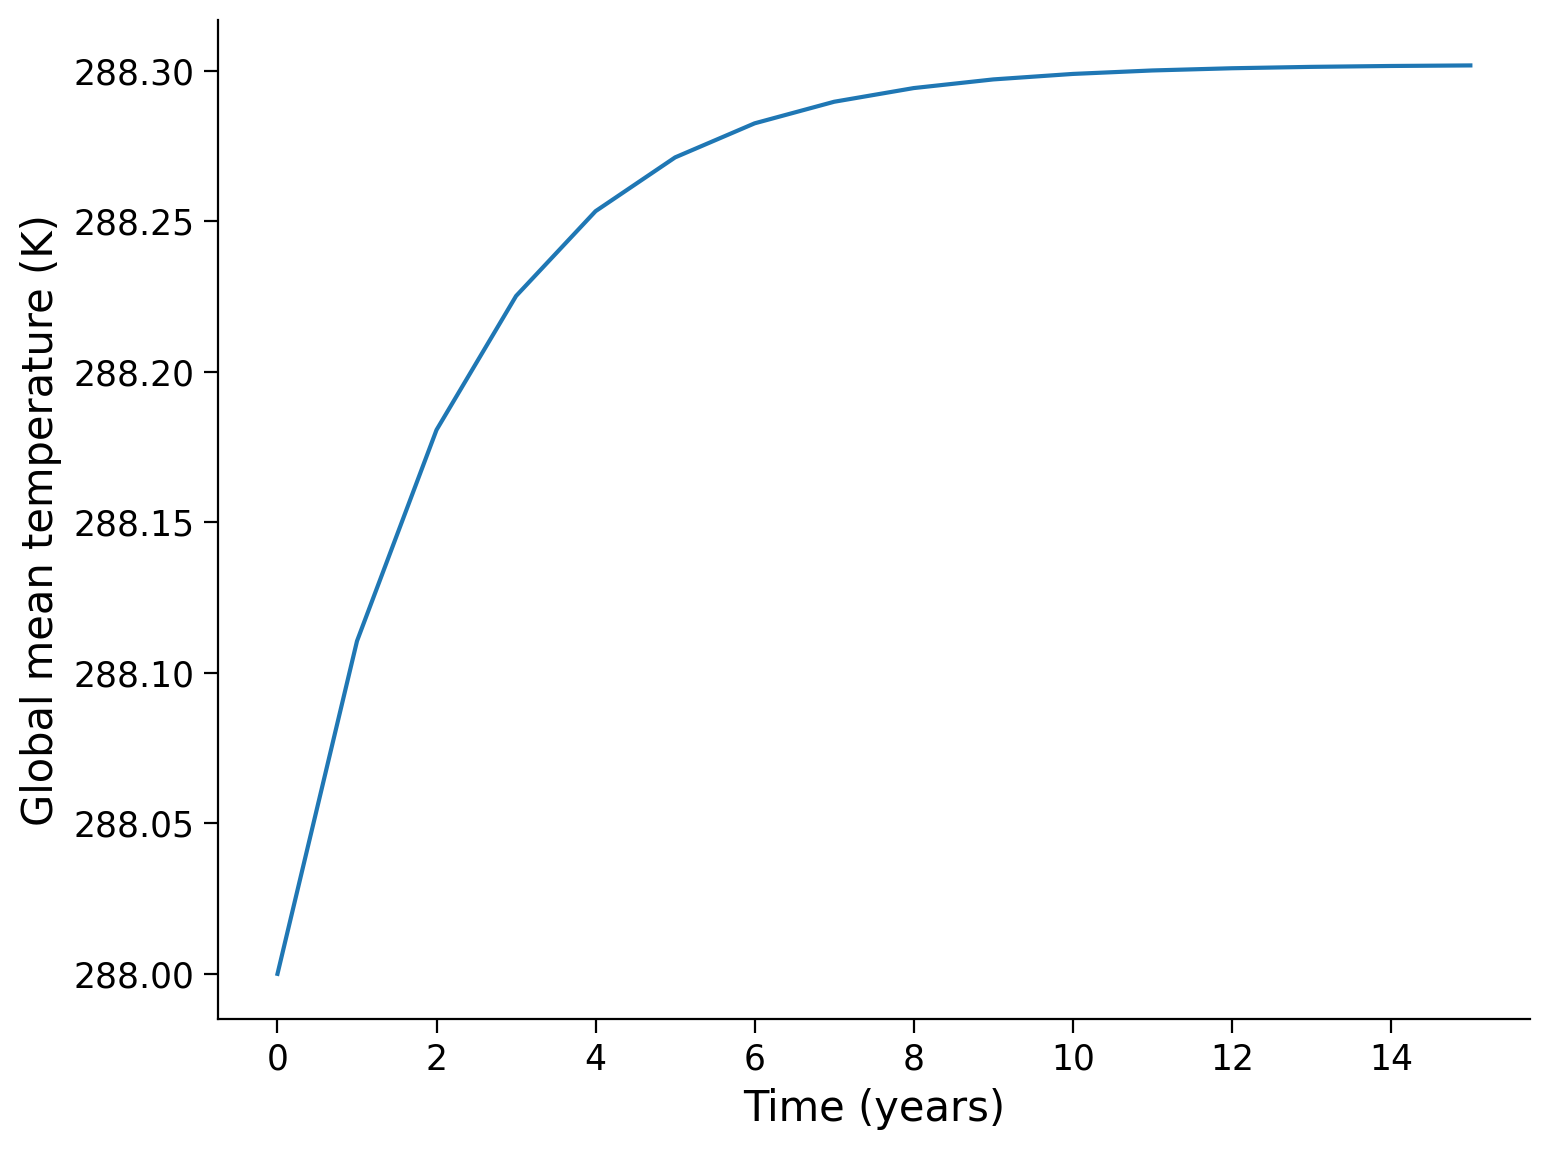

In [59]:
# plot the results
fig, ax = plt.subplots()
ax.plot(t_series, T_series)
ax.set_xlabel("Time (years)")
ax.set_ylabel("Global mean temperature (K)")

### Questions 1.2


1. Do you think the time step (interval) we have used will affect the solution? If so, how?


In [60]:
# to_remove explanation

"""
1. It will affect the solution our model provides. Euler's method is a linear approximation of the 'truth', and thus if the true answer (say analytically found) is very non-linear than our solution will be very sensitive to the time step used. Generally a smaller time step will provide a more accurate solution (i.e. closer to the 'truth'). With more complex models, there is also a tradeoff with computing resources where adding shorter timesteps can significantly increase the computation time of the desired length of simulation.
"""

"\n1. It will affect the solution our model provides. Euler's method is a linear approximation of the 'truth', and thus if the true answer (say analytically found) is very non-linear than our solution will be very sensitive to the time step used. Generally a smaller time step will provide a more accurate solution (i.e. closer to the 'truth'). With more complex models, there is also a tradeoff with computing resources where adding shorter timesteps can significantly increase the computation time of the desired length of simulation.\n"

In [61]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Questions_1_2")

### Coding Exercise 1.2


1.  Using a for loop, run the model for 15 years with three different intervals ($dt$) of a half year, 1 year, and 5 years and plot the results. Note you will have to change the number of timesteps used when changing `dt` so that the model runs for the same amount of time. Plot your results on the same figure.


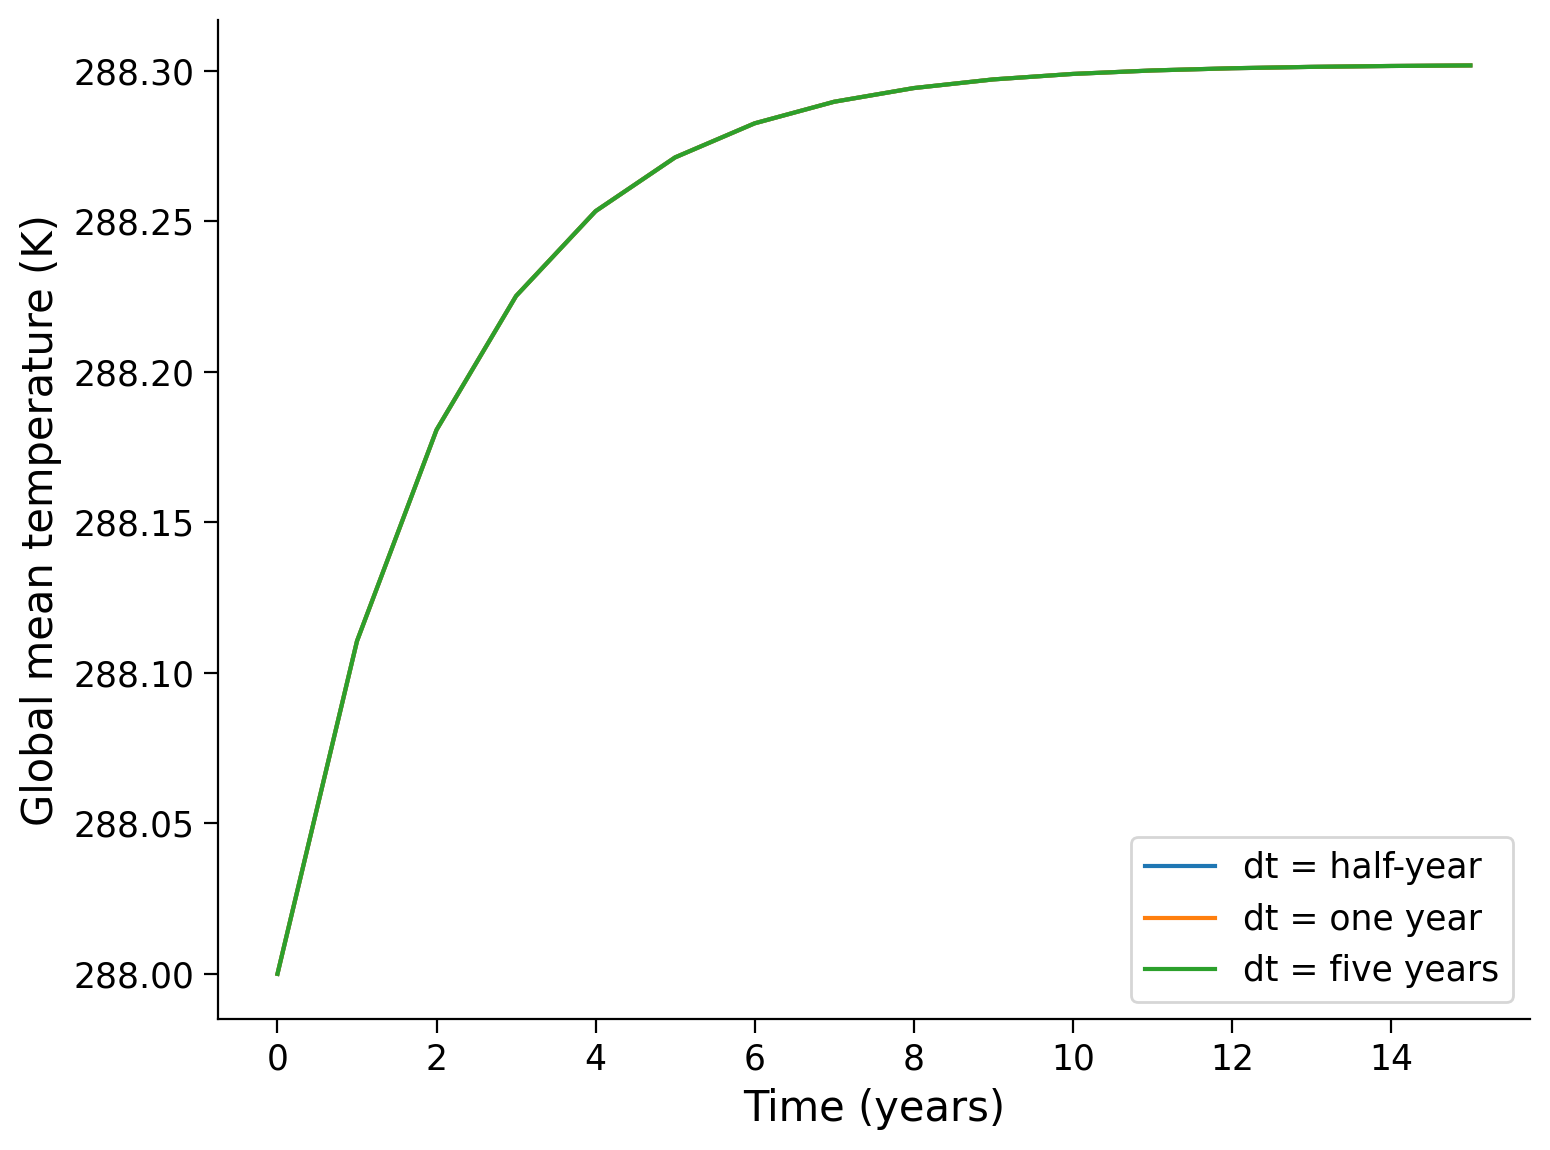

In [62]:
# one year expressed in seconds
one_yr = 60.0 * 60.0 * 24.0 * 365.0

# legend labels
labels = ["dt = half-year", "dt = one year", "dt = five years"]

# define the number of timesteps (years) to run the model
numtsteps = np.array([10, 5, 1]) * 3

# for converting the number of seconds in a year
sec_2_yr = 3.154e7

fig, ax = plt.subplots()
# loop through each choice of time step
for dd, dt_2 in enumerate([one_yr * 0.5, one_yr, one_yr * 5]):
    # set the intial temperature (initial condition)
    ...

    # set the initial time to 0
    ...

    # run the model
    for n in range(numtsteps[dd]):
        # calculate and append the time since running the model, dependent on dt and the numtsteps
        ...

        # calculate and append the new temperature using our pre-defined function step_forward()
        ...

    ax.plot(t_series, T_series, label=labels[dd])

ax.set_xlabel("Time (years)")
ax.set_ylabel("Global mean temperature (K)")
ax.legend()

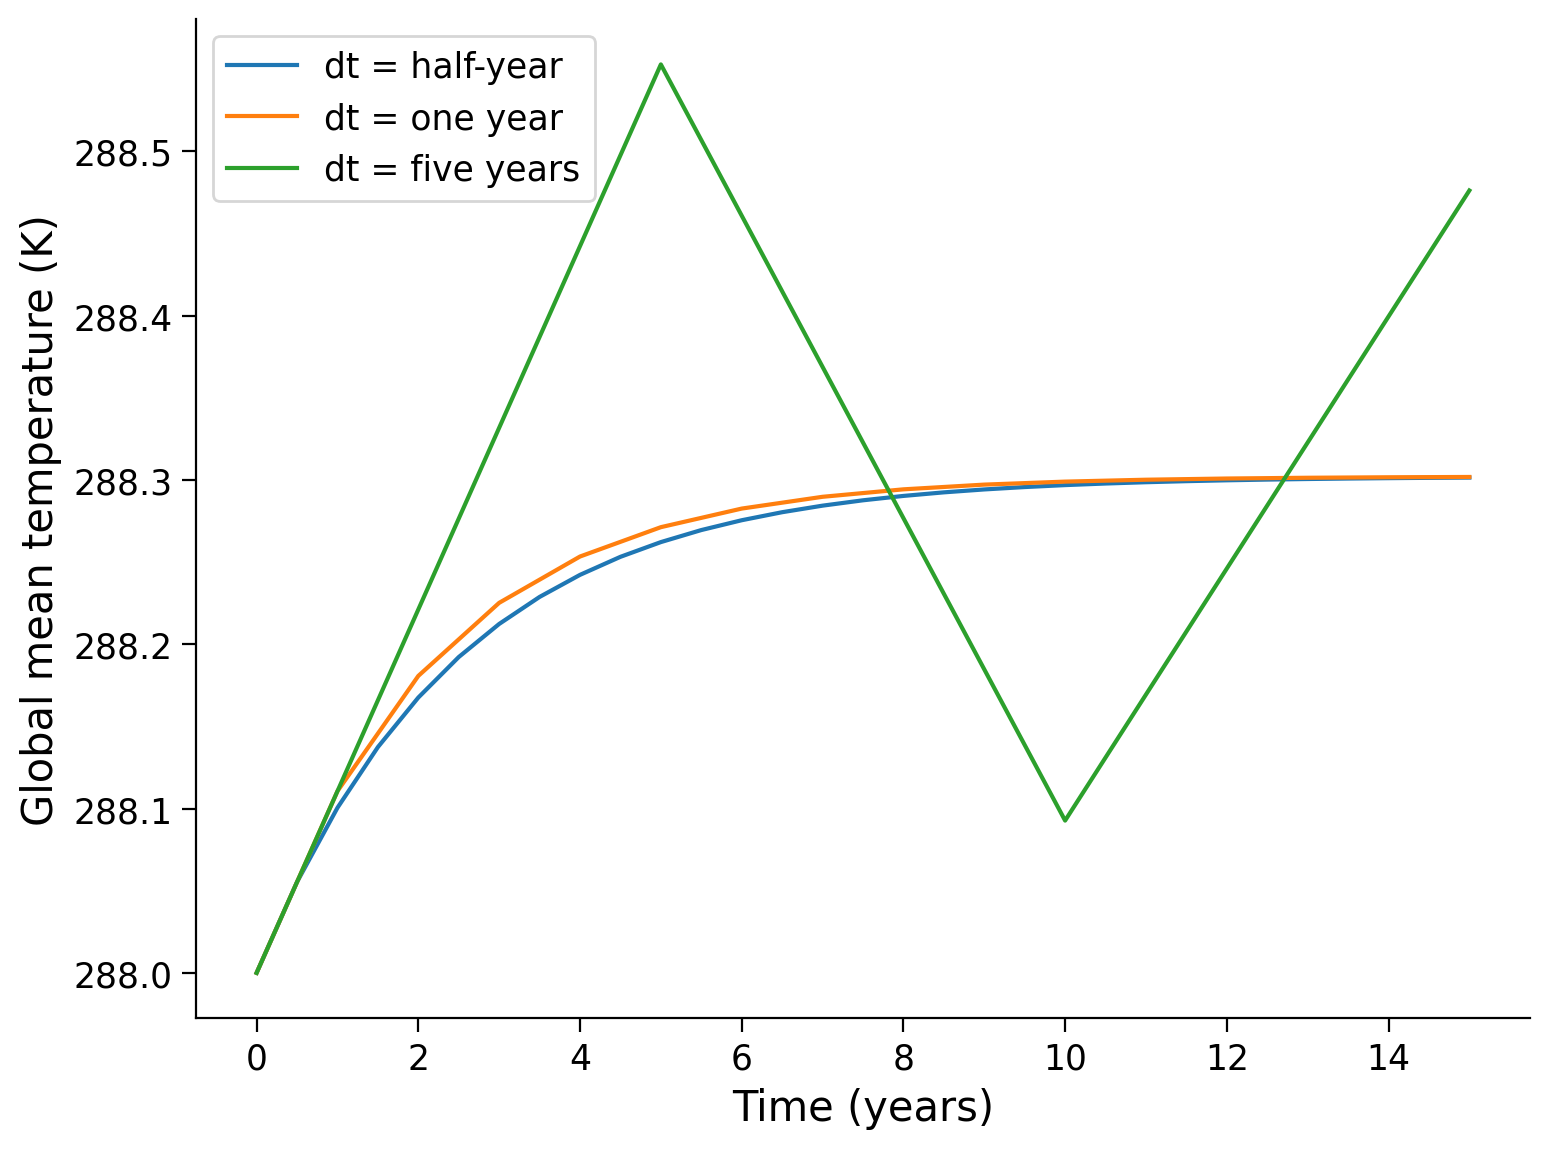

In [63]:
# to_remove solution

# one year expressed in seconds
one_yr = 60.0 * 60.0 * 24.0 * 365.0

# legend labels
labels = ["dt = half-year", "dt = one year", "dt = five years"]

# define the number of timesteps (years) to run the model
numtsteps = np.array([10, 5, 1]) * 3

# for converting the number of seconds in a year
sec_2_yr = 3.154e7

fig, ax = plt.subplots()
# loop through each choice of time step
for dd, dt_2 in enumerate([one_yr * 0.5, one_yr, one_yr * 5]):
    # set the intial temperature (initial condition)
    T_series = [288]

    # set the initial time to 0
    t_series = [0]

    # run the model
    for n in range(numtsteps[dd]):
        # calculate and append the time since running the model, dependent on dt and the numtsteps
        t_series.append((n + 1) * dt_2 / sec_2_yr)

        # calculate and append the new temperature using our pre-defined function step_forward()
        T_series.append(step_forward(T_series[n], alpha=alpha, tau=tau, dt=dt_2))

    ax.plot(t_series, T_series, label=labels[dd])

ax.set_xlabel("Time (years)")
ax.set_ylabel("Global mean temperature (K)")
ax.legend()

In [64]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Coding_Exercises_1_2")

# Section 2: Revisiting the Climate Change Scenario from Tutorial 2


## Section 2.1: Enhanced Greenhouse Effect


In Tutorial 2 we looked at how changing the transmissivity $\left(\tau\right)$ affected the equilibrium temperature $T_{\text{eq}}$. Now we can use our time-dependent model to investigate this in more depth. Reuse the model, this time setting $\tau = 0.57$.


Text(0, 0.5, 'Global mean temperature (K)')

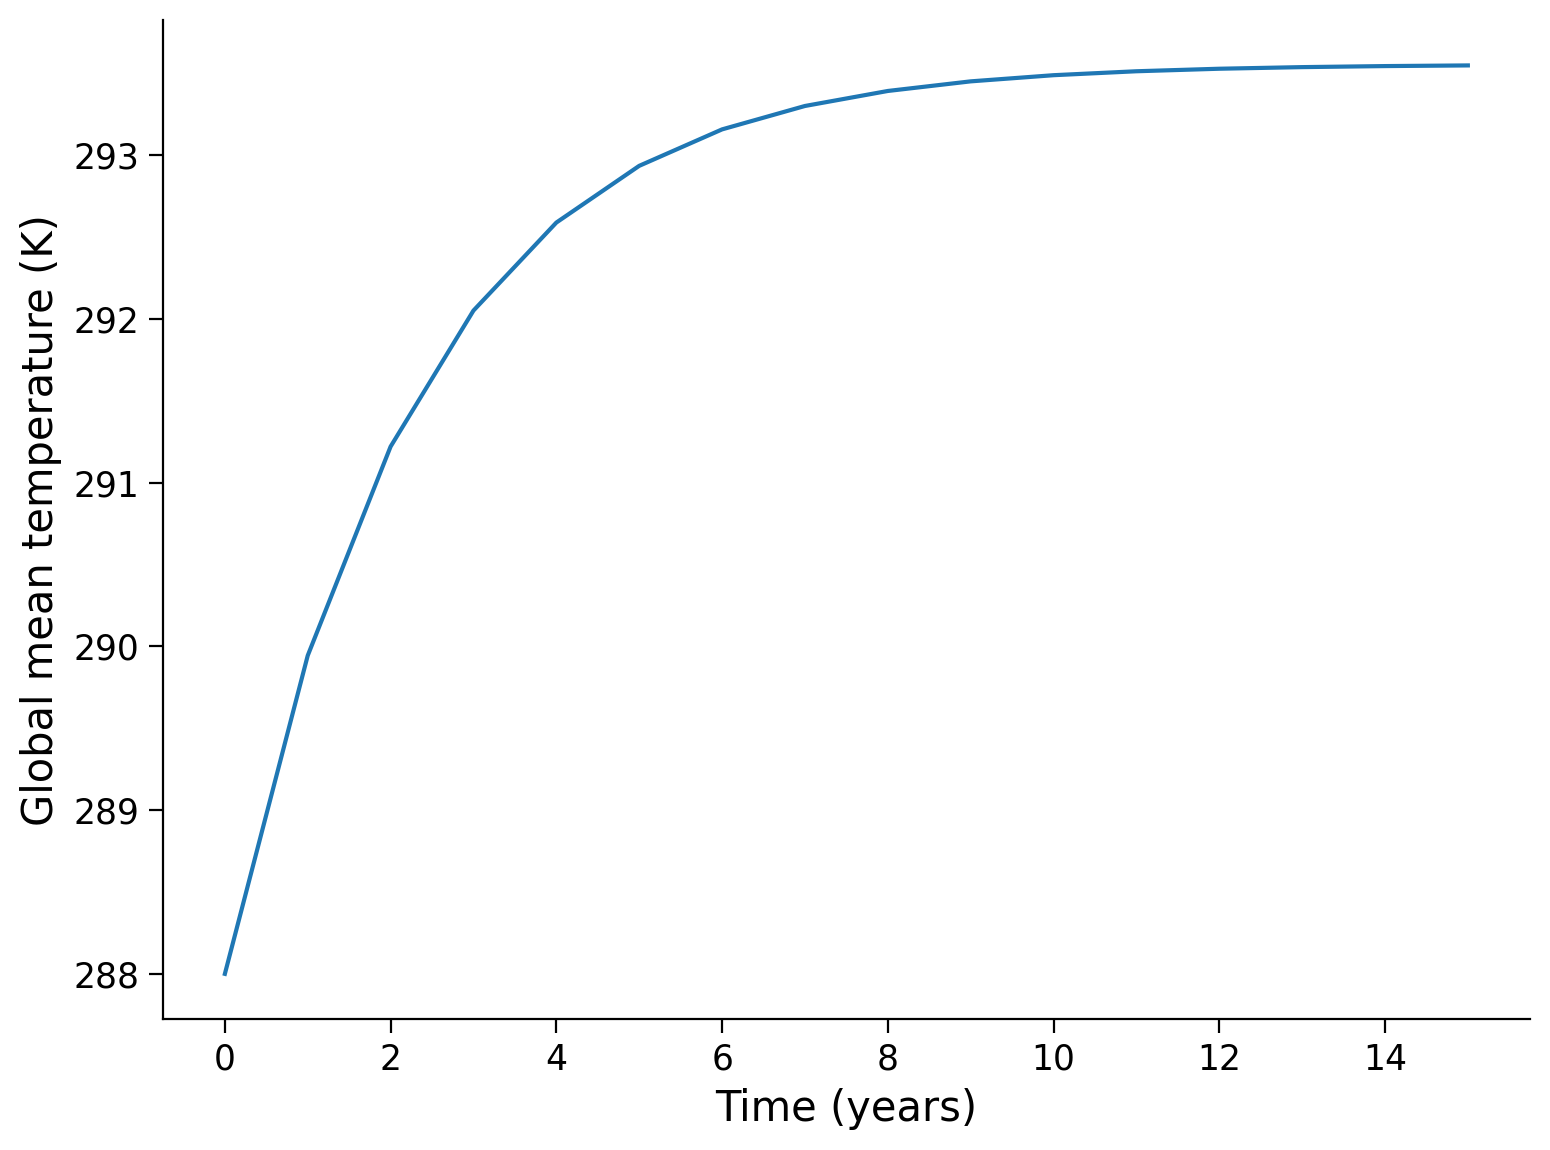

In [65]:
# define transmissivity (calculated previously from observations)
tau_2 = 0.57  # unitless number between 0 and 1

# define the number of timesteps (currently years) to run the model
numtsteps = 15

# set the intial temperature (initial condition)
T_series = [288]

# set the initial time to 0
t_series = [0]

# run the model
for n in range(numtsteps):
    # calculate and append the time since running the model, dependent on dt and the numtsteps
    t_series.append((n + 1) * dt / sec_2_yr)

    # calculate and append the new temperature using our pre-defined function
    T_series.append(step_forward(T_series[n], alpha=alpha, tau=tau_2, dt=dt))

fig, ax = plt.subplots()
ax.plot(t_series, T_series)

ax.set_xlabel("Time (years)")
ax.set_ylabel("Global mean temperature (K)")

### Questions 2.1


1.  How does the long-term temperature $T_{\text{eq}}$ here compare to the value you found from Tutorial 2?


In [66]:
# to_remove explanation

"""
1. It is the same.
"""

'\n1. It is the same.\n'

In [67]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Questions_2_1")

# Bonus Coding Exercise: Equilibrium Climate Sensitivity


Here we define the **[equilibrium climate sensitivity](https://www.ipcc.ch/report/ar6/wg1/downloads/report/IPCC_AR6_WGI_AnnexVII.pdf)** as the long-term global warming (equilibrium temperature increase) caused by a doubling of carbon dioxide above its pre-industrial concentration. The impact of a doubling of carbon dioxide on these energy flows is measured by a [radiative forcing](https://www.ipcc.ch/report/ar6/wg1/downloads/report/IPCC_AR6_WGI_AnnexVII.pdf). Here a positive radiation forcing leads to warming, and a negative radiative forcing leads to cooling.

The equilibrium climate sensitivity depends on a number of things, including physics and feedbacks of the model used. In the following exercise, you will calculate the equilibrium climate sensitivity of _our_ model.

1. Write a function called `step_forward()` as from above, and then create another function that adds in a radiative forcing to the difference between $ASR$ and $OLR$ and call it `step_forward_forced()`. Make sure both functions output the energy balance of the model. Consistent with the [IPCC AR6](https://www.ipcc.ch/report/ar6/wg1/chapter/chapter-7/#Effective), use an effective radiative forcing of 3.93 W m$^{-2}$, where _effective_ means the climate system, but not the surface temperature, has been allowed to adjust.


In [68]:
# define your functions and constants

# define albedo
alpha = 0.2941  # unitless number between 0 and 1 (calculated previously from observations in tutorial 2)

# define transmissivity (calculated previously from observations in tutorial 1)
tau = 0.6127    # unitless number between 0 and 1

# effective radiative forcing for a doubling of CO2
F = 3.93  # W/m^2

# define the time interval, one year expressed in seconds
dt = 60.0 * 60.0 * 24.0 * 365.0

# for converting number of seconds in a year
sec_2_yr = 3.154e7


# define a function for absorbed shortwave radiation (ASR)
def ASR(alpha, Q):
    return (1 - alpha) * Q


# define a function for outgoing longwave radiation (OLR)
def OLR(tau, T):
    # define the Stefan-Boltzmann Constant, noting we are using 'e' for scientific notation
    sigma = 5.67e-8  # W m^-2 K^-4

    return tau * sigma * T**4


# create a function to find the new temperature based on the previous using Euler's method.
def step_forward(T, alpha, tau, dt):
    # define the observed insolation based on observations from the IPCC AR6 Figure 7.2
    ...

    # define the Stefan-Boltzmann Constant, noting we are using 'e' for scientific notation
    ...

    Ftoa = ...

    T_new = ...

    return ...


# create a function to find the new temperature based on the previous using Euler's method.
def step_forward_forced(T, alpha, tau, dt):
    # define the observed insolation based on observations from the IPCC AR6 Figure 7.2
    ...

    # define the Stefan-Boltzmann Constant, noting we are using 'e' for scientific notation
    ...

    Ftoa = ...

    T_new = ...

    return ...

In [69]:
# to_remove solution

# define your functions and constants

# define albedo
alpha = 0.2941  # unitless number between 0 and 1 (calculated previously from observations in tutorial 2)

# define transmissivity (calculated previously from observations in tutorial 1)
tau = 0.6127    # unitless number between 0 and 1

# effective radiative forcing for a doubling of CO2
F = 3.93  # W/m^2

# define the time interval, one year expressed in seconds
dt = 60.0 * 60.0 * 24.0 * 365.0

# for converting number of seconds in a year
sec_2_yr = 3.154e7


# define a function for absorbed shortwave radiation (ASR)
def ASR(alpha, Q):
    return (1 - alpha) * Q


# define a function for outgoing longwave radiation (OLR)
def OLR(tau, T):
    # define the Stefan-Boltzmann Constant, noting we are using 'e' for scientific notation
    sigma = 5.67e-8  # W m^-2 K^-4

    return tau * sigma * T**4


# create a function to find the new temperature based on the previous using Euler's method.
def step_forward(T, alpha, tau, dt):
    # define the observed insolation based on observations from the IPCC AR6 Figure 7.2
    Q = 340  # W m^-2

    Ftoa = ASR(alpha, Q) - OLR(tau, T)

    T_new = T + dt / C * Ftoa

    return T_new, Ftoa


# create a function to find the new temperature based on the previous using Euler's method.
def step_forward_forced(T, alpha, tau, dt):
    # define the observed insolation based on observations from the IPCC AR6 Figure 7.2
    Q = 340  # W m^-2

    # define the Stefan-Boltzmann Constant, noting we are using 'e' for scientific notation
    sigma = 5.67e-8  # W m^-2 K^-4

    Ftoa = ASR(alpha, Q) - OLR(tau, T) + F

    T_new = T + dt / C * Ftoa

    return T_new, Ftoa

In [70]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Bonus_Coding_Exercises_3_1")

2. Using an initial temperature of 288 K, run the model to equilibrium. Make sure your model is in equilbrium by checking that the energy balance is near zero.


In [71]:
# run the model to equilibrium without forcing and begining with T(0) = 288K

# define the number of timesteps (years) to run the model
numtsteps = 40

# set the intial temperature (initial condition)
T_series = [288]

# set the initial time to 0
t_series = [0]

# run the model
for n in range(numtsteps):
    # calculate and append the time since running the model, dependent on dt and the numtsteps
    t_series.append(...)

    # calculate and append the new temperature using our pre-defined function and get energy balance
    ...
    T_series.append(...)

print(...)

Ellipsis


In [72]:
# to_remove solution

# run the model to equilibrium without forcing and begining with T(0) = 288K

# define the number of timesteps (years) to run the model
numtsteps = 40

# set the intial temperature (initial condition)
T_series = [288]

# set the initial time to 0
t_series = [0]

# run the model
for n in range(numtsteps):
    # calculate and append the time since running the model, dependent on dt and the numtsteps
    t_series.append((n + 1) * dt / sec_2_yr)

    # calculate and append the new temperature using our pre-defined function and get energy balance
    T_new, Ftoa = step_forward(T_series[n], alpha=alpha, tau=tau, dt=dt)
    T_series.append(T_new)

print(Ftoa)

1.8614628061186522e-08


In [73]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Bonus_Coding_Exercises_3_2")

3. Run the forced model equilibrium using the unforced equilibrium temperature as your inital condition and the `step_forward_forced()` function you wrote above.


In [74]:
# define the number of timesteps (years) to run the model
numtsteps = 40

# set initial condition (temperature) to the equilibrium value from the last run without forcing
T_series_forced = [T_series[-1]]

# set the initial time to 0
t_series_forced = [0]

# run the model
for n in range(numtsteps):
    # calculate and append the time since running the model, dependent on dt and the numtsteps
    t_series_forced.append(...)

    # calculate and append the new temperature using our pre-defined function and get energy balance
    ...
    T_series_forced.append(...)

print(...)

Ellipsis


In [75]:
# to_remove solution

# run the model to equilibrium without forcing and begining with T(0) = 288K

# define the number of timesteps (years) to run the model
numtsteps = 40

# set initial condition (temperature) to the equilibrium value from the last run without forcing
T_series_forced = [T_series[-1]]

# set the initial time to 0
t_series_forced = [0]

# run the model
for n in range(numtsteps):
    # calculate and append the time since running the model, dependent on dt and the numtsteps
    t_series_forced.append((n + 1) * dt / sec_2_yr)

    # calculate and append the new temperature using our pre-defined function and get energy balance
    T_new_forced, Ftoa_forced = step_forward_forced(
        T_series_forced[n], alpha=alpha, tau=tau, dt=dt
    )
    T_series_forced.append(T_new_forced)

print(Ftoa_forced)

5.583137197007204e-08


In [76]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Bonus_Coding_Exercises_3_3")

4. Plot the temperature curve from the forced simulation as a function of time.


Text(0, 0.5, 'Global mean temperature (K)')

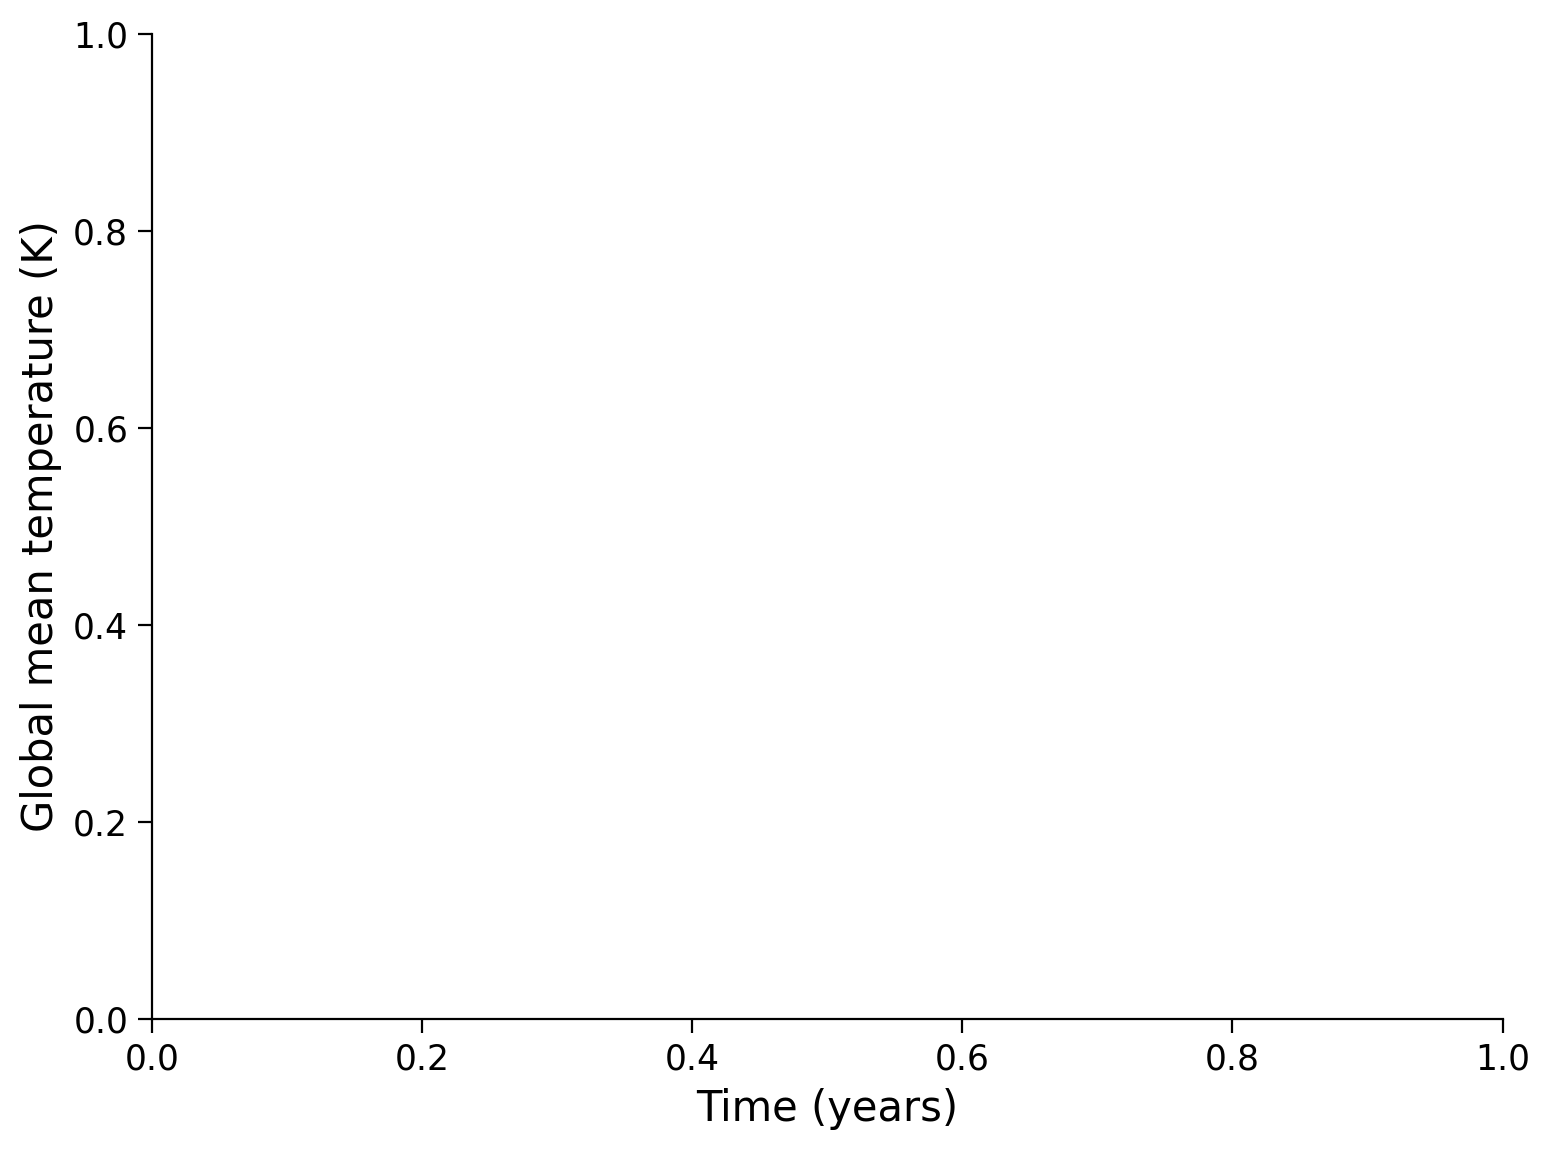

In [77]:
# plot the time series
fig, ax = plt.subplots()
_ = ...

ax.set_xlabel("Time (years)")
ax.set_ylabel("Global mean temperature (K)")

Text(0, 0.5, 'Global mean temperature (K)')

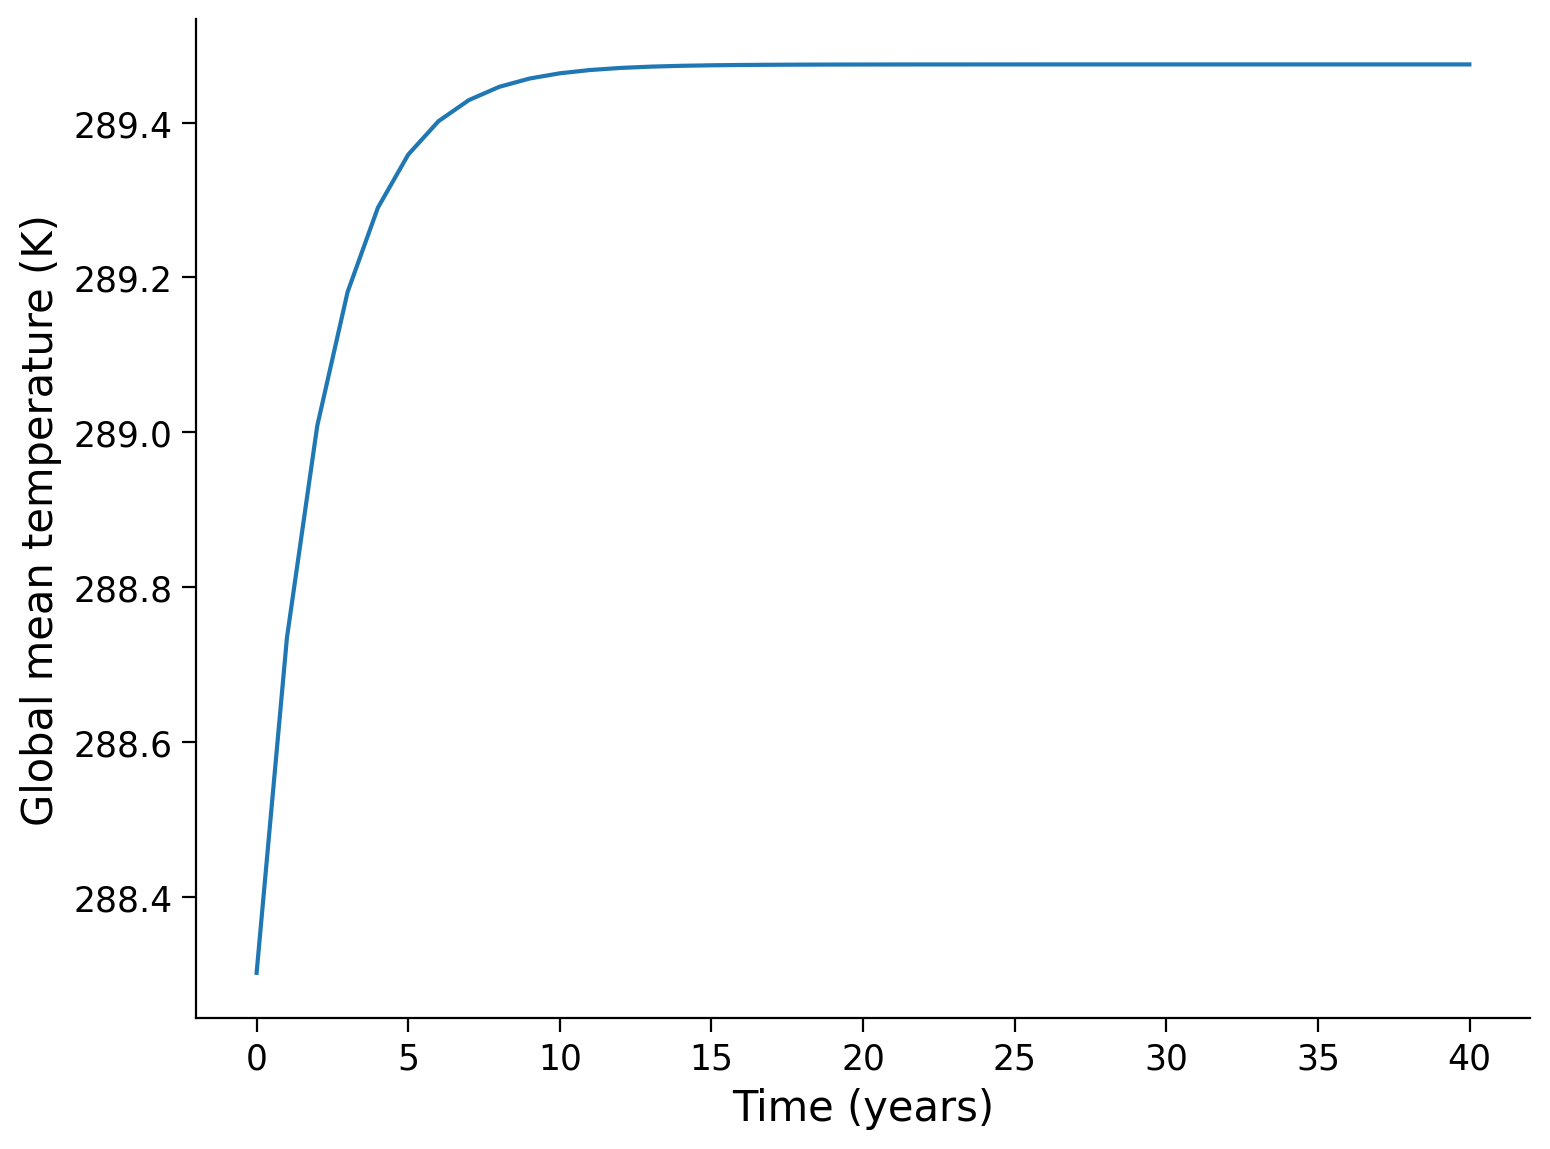

In [78]:
# to_remove solution

# plot the time series
fig, ax = plt.subplots()
_ = ax.plot(t_series_forced, T_series_forced)

ax.set_xlabel("Time (years)")
ax.set_ylabel("Global mean temperature (K)")

In [79]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Bonus_Coding_Exercises_3_4")

5. Subtract the intial temperature used for your forced simulation from the final temperature after running to equilibrium to get the equilibrium climate sensitivty.


In [80]:
# calculate equilibrium climate sensitivity
ecs = ...
print("Equilibrium Climate Sensitivity: ", ecs)

Equilibrium Climate Sensitivity:  Ellipsis


In [81]:
# to_remove solution

# calculate equilibrium climate sensitivity
ecs = T_series_forced[-1] - T_series_forced[0]
print("Equilibrium Climate Sensitivity: ", ecs)

Equilibrium Climate Sensitivity:  1.1730285908173528


In [82]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Bonus_Coding_Exercises_3_5")

## Bonus Questions: Climate Connection


1. How does this compare to the IPCC AR6 estimate of [equilibrium climate sensitivity of 2-5 K](https://www.ipcc.ch/report/ar6/wg1/chapter/chapter-7/#Climate)? Is it higher or lower? Note here it is a temperature difference, so the units of C in the report and K found here are interchangeable.
2. In your own words, describes what this implies with respect to global mean temperatures in our models versus those in used in the IPCC report.
3. What do you think could be missing in our model?


In [83]:
# to_remove explanation

"""
1. It is lower.
2. It means that for the same radiative forcing, our model's surface temperature was less affected by the CO2 change.
3. There are many things, but two important ones are climate feedbacks and physics, which we will add in over the next few tutorials. Our current model only contains one feedback, the 'Planck feedback' also known as a 'Planck temperature response'. This is principally because as we warm we emit more energy (see Planck's law from Tutorial 1).
"""

"\n1. It is lower.\n2. It means that for the same radiative forcing, our model's surface temperature was less affected by the CO2 change.\n3. There are many things, but two important ones are climate feedbacks and physics, which we will add in over the next few tutorials. Our current model only contains one feedback, the 'Planck feedback' also known as a 'Planck temperature response'. This is principally because as we warm we emit more energy (see Planck's law from Tutorial 1).\n"

In [84]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Bonus_Questions_3")

# Summary

In this tutorial, you explored the relationship between the heat capacity of the atmosphere and oceans and temperature changes over time. You learned how to calculate the heat capacity of these components and used this knowledge to develop a climate model. This model simulates the change in global mean surface temperature in response to energy imbalances. You explored the effects of transmissivity on the equilibrium temperature and discussed equilibrium climate sensitivity.


# Resources

Useful links:
- [The Climate Laboratory](https://brian-rose.github.io/ClimateLaboratoryBook/) by Brian E. J. Rose
- [Numerical Discretization](https://glossarytest.ametsoc.net/wiki/Discretization)
- [Lists and List Comprehension](https://docs.python.org/3/tutorial/datastructures.html)
- [Chapter 7, IPCC AR6](https://www.ipcc.ch/report/ar6/wg1/chapter/chapter-7)
- [Equilibrium Climate Sensitivity, Annex VII, IPCC AR6](https://www.ipcc.ch/report/ar6/wg1/downloads/report/IPCC_AR6_WGI_AnnexVII.pdf)